In [6]:
# Importing modules
import csv
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [7]:
''' Cleaning data: 
-removing time from sale date  
-removing when sale price <= 1000
-removing when description says DO NOT USE!!
-removing duplicates 

These changes led to the removal of about 4000 unecessary entries
'''
filtered_rows = []

# Open the input CSV file
with open('Latest_Sales(2002to2024).csv', mode='r', newline='') as infile:
    csvreader = csv.reader(infile, delimiter=',')
    rows = list(csvreader)  # Read all rows into a list

    # Modify the date-time strings in each row
    for row in rows:

        # Cleaning according to line 1 description
        if row[5] <= '1000' or row[5] == '' or row[4] =='' or row[11] == 'DO NOT USE!!':
            continue
        else:    
            # Remove the time part from the date-time string
            date_time = row[4].split()[0]
            row[4] = date_time
            filtered_rows.append(row)
        


# Open the output CSV file and write the modified data
with open('Cleaned_Sales.csv', mode='w', newline='') as outfile:
    csvwriter = csv.writer(outfile, delimiter=',')
    csvwriter.writerows(filtered_rows)  # Write all rows back to the file


# Removing Duplicates

# Read the CSV file
df = pd.read_csv('Cleaned_Sales.csv')

# Remove duplicates based on specific columns
df = df.drop_duplicates(subset=['DocumentNumber', 'SalesDate', 'SalesPrice', 'Grantor'], keep='first')

# Save the result to a new CSV file
df.to_csv('NoDupes.csv', index=False)

# Rename the temporary file to the original file's name
os.replace('NoDupes.csv', 'Cleaned_Sales.csv')
   


In [8]:
"""
This portion will be used to create the dataframe and examine it
"""

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('Cleaned_Sales.csv')

#df.describe()

# Select only the "SalesPrice" and "SalesDate" columns
selected_columns = df[['SalesPrice', 'SalesDate']]

# Print the table containing only the selected columns
#print(selected_columns)
selected_columns.describe()

,SalesPrice
count,4.427600e+04
mean,3.765550e+05
std,7.473410e+05
min,1.080000e+02
25%,2.065000e+05
50%,3.000000e+05
75%,4.240000e+05
max,6.005913e+07


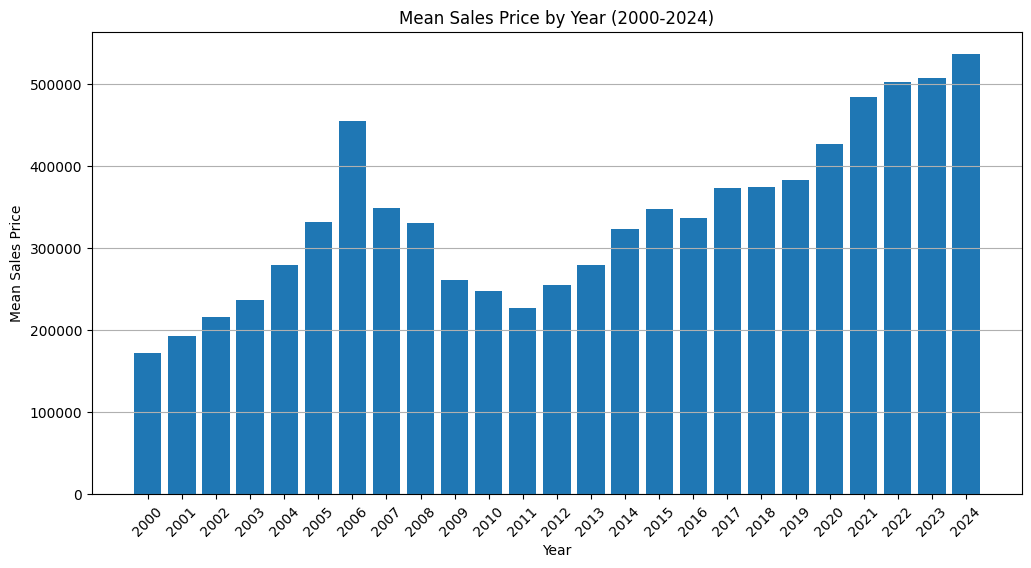

In [9]:
"""
Now let's make a bar graph to see the trend of home prices over the past 2 and 
a half decades
"""

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('Cleaned_Sales.csv')

# Convert the 'SalesDate' column to datetime format
df['SalesDate'] = pd.to_datetime(df['SalesDate'], format='%Y/%m/%d', errors='coerce')

# Drop rows with NaT (invalid dates)
df = df.dropna(subset=['SalesDate'])

# Extract the year from the 'SalesDate' column
df['Year'] = df['SalesDate'].dt.year

# Removing data before 2000 or after 2024
df = df[(df['Year'] >= 2000) & (df['Year'] <= 2024)]

# Group by year and calculate the mean sale price for each year
yearly_sales = df.groupby('Year')['SalesPrice'].mean()

# Create a bar graph with years on the x-axis and mean sale price on the y-axis
plt.figure(figsize=(12, 6))
plt.bar(yearly_sales.index, yearly_sales.values)
plt.xlabel('Year')
plt.ylabel('Mean Sales Price')
plt.title('Mean Sales Price by Year (2000-2024)')
plt.xticks(range(2000, 2025), rotation=45)
plt.grid(axis='y')
plt.show()

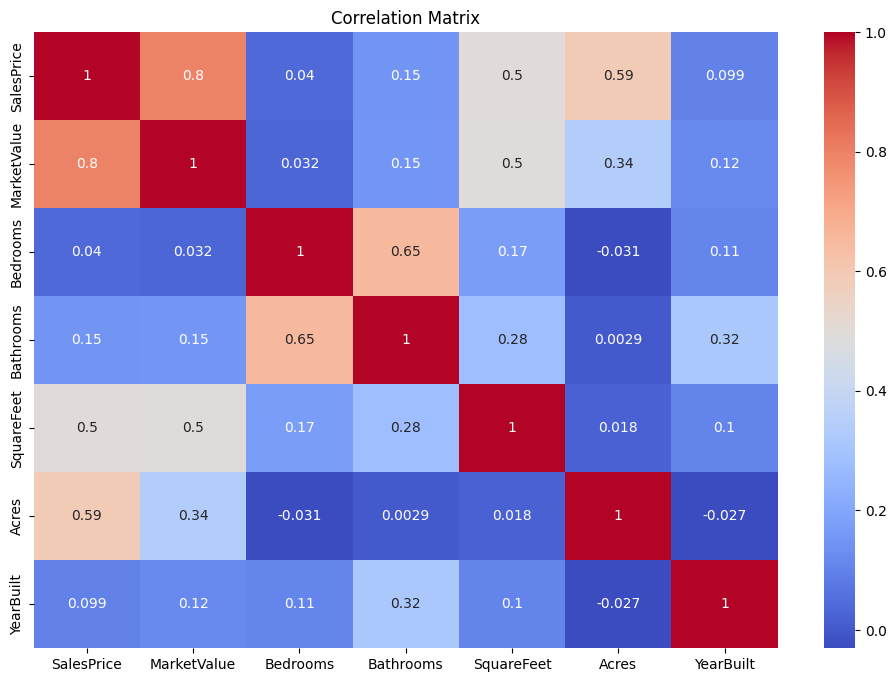

In [10]:
"""
Correlation matrix guide:
1: A perfect positive correlation. This means that as one variable increases, the other variable also increases proportionally.
0: No correlation. There is no relationship between the two variables.
-1: A perfect negative correlation. This means that as one variable increases, the other variable decreases proportionally.
"""

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('Cleaned_Sales.csv')

df = df[['SalesPrice','MarketValue','Bedrooms','Bathrooms','SquareFeet','Acres','YearBuilt']]
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix with colors
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

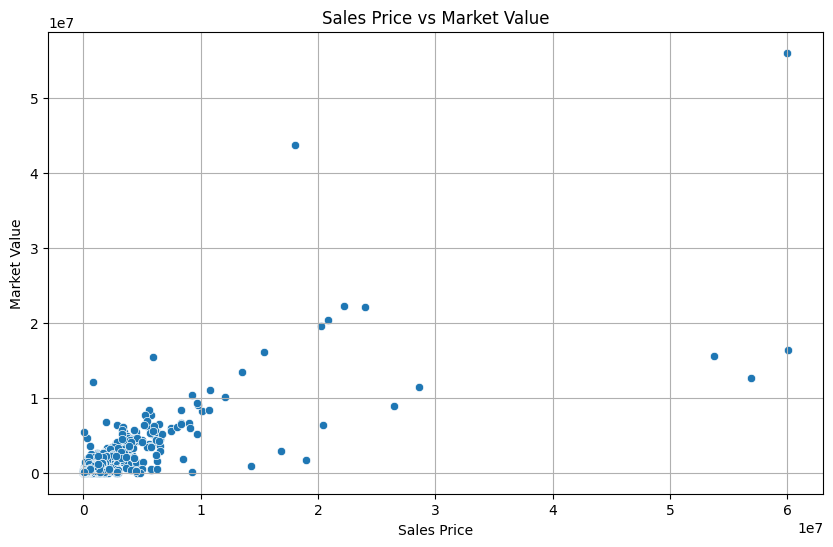

On average, the SalesPrice was 8.32% lower than the 'MarketValue' across all entries 


In [11]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('Cleaned_Sales.csv')
 
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SalesPrice', y='MarketValue')
plt.xlabel('Sales Price')
plt.ylabel('Market Value')
plt.title('Sales Price vs Market Value')
plt.grid(True)
plt.show()

# Calculate the percent difference
df['PercentDifference'] = ((df['SalesPrice'] - df['MarketValue']) / df['SalesPrice']) * 100


# Calculate the mean percent difference, excluding rows where MarketValue is 0
mean_percent_difference = df['PercentDifference'].mean()
mean_percent_difference = round(mean_percent_difference,2)
print(f"On average, the SalesPrice was {mean_percent_difference}% lower than the 'MarketValue' across all entries ")


In [12]:
"""
Let's take a deeper look at our closest towns are see how they compare
"""

# Create fresh dataframe
df = pd.read_csv('Cleaned_Sales.csv')

# Find all uniques possibilities of SiteCity
df['SiteCity'].unique()

# Isolate sales that are in Ashland, Talent, Phoenix and Medford
df = df[(df['SiteCity'] == 'TALENT') | (df['SiteCity'] == 'ASHLAND') | 
        (df['SiteCity'] == 'PHOENIX') | (df['SiteCity'] == 'MEDFORD')]

# Group the data by city and calculate the average for each column, rounding to 2 decimal places
avg_data = df.groupby('SiteCity').agg({'SalesPrice': lambda x: round(x.mean(), 2),
                                       'Bedrooms': lambda x: round(x.mean(), 2),
                                       'Bathrooms': lambda x: round(x.mean(), 2),
                                       'YearBuilt': lambda x: round(x.mean(), 2)}).reset_index()

# Rename columns for clarity
avg_data.columns = ['City', 'Avg Sales Price $', 'Avg Bedrooms', 'Avg Bathrooms', 'Avg Year Built']

# Display the table
print(avg_data)

      City  Avg Sales Price $  Avg Bedrooms  Avg Bathrooms  Avg Year Built
0  ASHLAND          475009.19          2.83           2.09         1975.62
1  MEDFORD          346976.86          3.01           1.97         1979.69
2  PHOENIX          292293.68          2.98           1.92         1984.47
3   TALENT          298256.22          2.93           1.96         1991.15


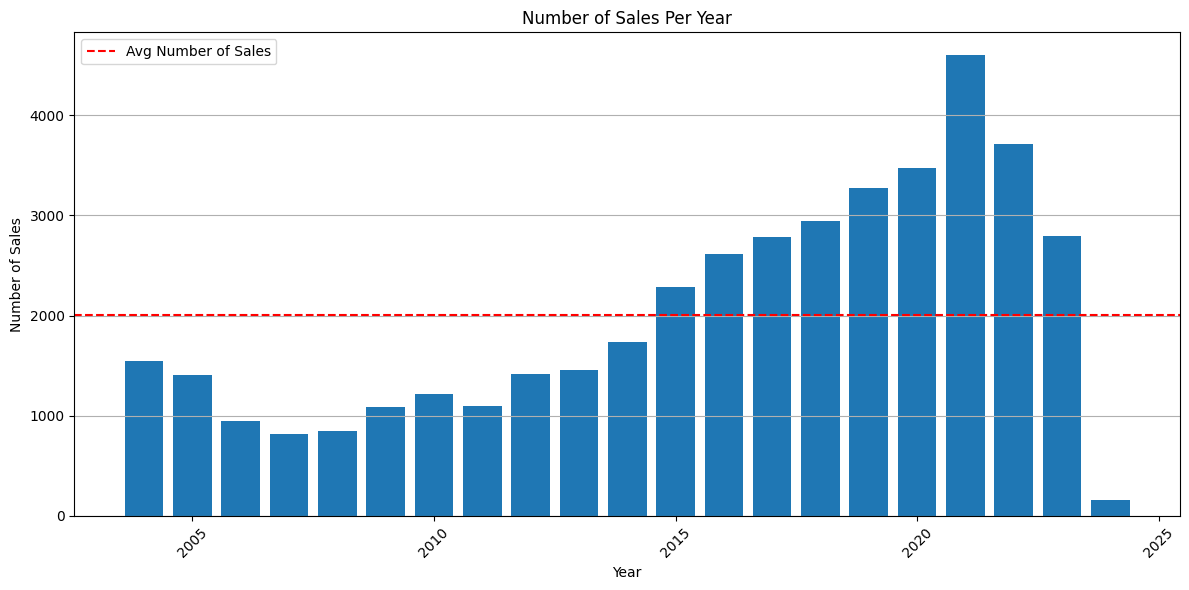

In [13]:
"""
Why not find the number of yearly sales? Maybe we can see a trend...
"""

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('Cleaned_Sales.csv')

# Convert the 'SalesDate' column to datetime format
data['SalesDate'] = pd.to_datetime(data['SalesDate'], format='%Y/%m/%d', errors='coerce')

# Drop rows with NaT (invalid dates)
data = data.dropna(subset=['SalesDate'])

# Extract the year from the 'SalesDate' column
data['Year'] = data['SalesDate'].dt.year

data = data[(data['Year'] >= 2004) & (data['Year'] <= 2024)]

# Calculate the total number of sales for each year
yearly_sales_count = data.groupby('Year')['SalesPrice'].count()

# Calculate the average number of sales per year
avg_sales_per_year = yearly_sales_count.mean()

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(yearly_sales_count.index, yearly_sales_count.values)
plt.axhline(y=avg_sales_per_year, color='r', linestyle='--', label='Avg Number of Sales')
plt.title('Number of Sales Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: >

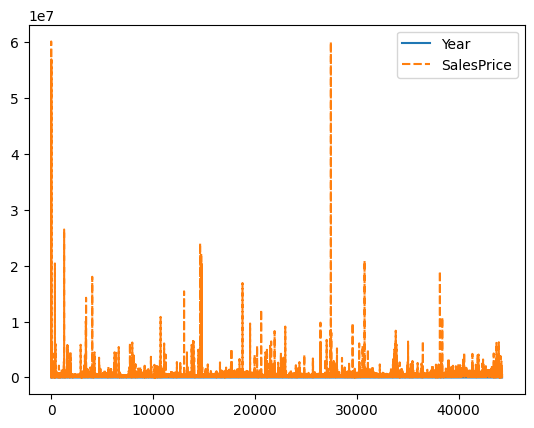

In [52]:
# Get the csv file
df = pd.read_csv('Cleaned_Sales.csv')

# Use loc to make our dataframe focused on date and price
df = df.loc[:, ['SalesDate', 'SalesPrice']]

# Fix the formatting for date of sale
df['SalesDate'] = pd.to_datetime(df['SalesDate'], format='%Y/%m/%d', errors='coerce')

# Drop rows with NaT (invalid dates)
df = df.dropna(subset=['SalesDate'])

# Extract the year and month from the 'SalesDate' column
df['Year'] = df['SalesDate'].dt.year
df['Month'] = df['SalesDate'].dt.month

# Change range of years to 2004 to 2024
df = df[(df['Year'] >= 2004) & (df['Year'] <= 2024)]

# Zone in on Month
df_combo = df.loc[:, ['Year', 'SalesPrice']]
df_combo

sns.lineplot(df_combo)

#print(df.max())

<Axes: xlabel='SalesDate'>

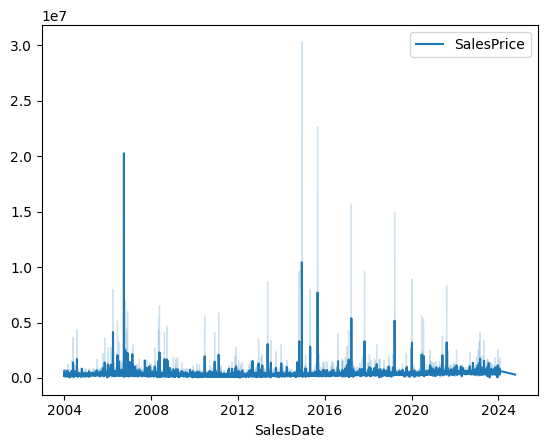

In [82]:

# Get the csv file
df = pd.read_csv('Cleaned_Sales.csv')

# Use loc to make our dataframe focused on date and price
df = df.loc[:, ['SalesDate', 'SalesPrice']]

# Fix the formatting for date of sale
df['SalesDate'] = pd.to_datetime(df['SalesDate'], format='%Y/%m/%d', errors='coerce')

# Drop rows with NaT (invalid dates)
df = df.dropna(subset=['SalesDate'])

# Change range of years to 2004 to 2024
df = df[(df['SalesDate'].dt.year >= 2004) & (df['SalesDate'].dt.year <= 2024)]

df.index = df['SalesDate']
del df['SalesDate']
#print(df)

sns.lineplot(df)

In [ ]:
'''
make map like tutorial for funsies
'''
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

import folium
import geopandas as gpd

california_shapefile = 'tl_rd22_06_cousub.shp'
california_data = gpd.read_file(california_shapefile)

# Set the CRS to EPSG:4269
california_data.crs = "EPSG:4269"

# Convert the geometries to EPSG:4326
california_data = california_data.to_crs("EPSG:4326")

# Create map centered on California
california_map = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Add California boundaries to the map
folium.GeoJson(data=california_data, name='geojson').add_to(california_map)

# Save the map as an HTML file
california_map.save('california_map.html')

# Display the map
california_map
